In [32]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import os

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '48d8ffa6-9377-49c1-815b-9b5e91f37caf',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-06-21T16:00:52.057Z', 'error_code': 0, 'error_message': None, 'elapsed': 28, 'credit_count': 1, 'notice': None, 'total_count': 10127}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11132, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

In [24]:
type(data)

dict

In [52]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 20)

In [53]:
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11132,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19715050.00000,19715050.00000,False,NaN,1,NaN,NaN,None,2024-06-21T16:00:00.000Z,63679.59603,26660471294.91141,14.01180,-0.74417,-1.71204,-4.01978,-9.58511,-3.56075,-2.19674,1255446419745.06152,53.94200,1337271516666.01001,None,2024-06-21T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 23:19:44.522501
1,1027,Ethereum,ETH,ethereum,9077,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122276728.43750,122276728.43750,True,NaN,2,NaN,NaN,None,2024-06-21T15:59:00.000Z,3483.70060,15429660441.18370,-4.63850,-0.72927,-0.65494,0.66968,-7.42132,9.38263,2.30003,425975512403.59045,18.30230,425975512403.59003,None,2024-06-21T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 23:19:44.522501
2,825,Tether USDt,USDT,tether,89295,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112891354601.68275,116081999193.07195,True,NaN,3,NaN,NaN,None,2024-06-21T15:59:00.000Z,0.99935,53006786712.74401,3.57320,0.00587,0.00939,-0.00966,-0.04708,-0.12080,-0.08549,112818485205.78299,4.84740,116007070291.87000,None,2024-06-21T15:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-21 23:19:44.522501
3,1839,BNB,BNB,bnb,2186,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147583731.35557,147583731.35557,False,NaN,4,NaN,NaN,None,2024-06-21T15:59:00.000Z,582.35519,1800731053.06924,4.83350,-0.48390,-2.31774,-3.24248,-6.12764,-2.24990,3.58058,85946152103.88248,3.69280,85946152103.88000,None,2024-06-21T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 23:19:44.522501
4,5426,Solana,SOL,solana,690,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462008197.57732,578621125.01977,True,NaN,5,NaN,NaN,None,2024-06-21T15:59:00.000Z,131.08677,2063729321.24436,-16.83370,-1.29046,-1.60080,-8.72623,-27.58113,-14.57705,-25.27891,60563162096.61098,2.60220,75849574035.39000,None,2024-06-21T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 23:19:44.522501
5,3408,USDC,USDC,usd-coin,19831,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32696526721.37480,32696526721.37480,False,NaN,6,NaN,NaN,None,2024-06-21T15:59:00.000Z,0.99997,5616371548.73442,13.88810,0.00255,0.00226,-0.00139,-0.00797,-0.01135,-0.01362,32695469673.64197,1.40510,32695469673.64000,None,2024-06-21T15:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-21 23:19:44.522501
6,52,XRP,XRP,xrp,1342,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55618185850.00000,99987512072.00000,False,NaN,7,NaN,NaN,None,2024-06-21T16:00:00.000Z,0.48448,1093498241.44507,-3.04180,-1.10836,-1.55464,2.20631,-9.53333,-10.19991,-22.88034,26945973505.91743,1.15780,48448134533.89000,None,2024-06-21T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 23:19:44.522501
7,74,Dogecoin,DOGE,dogecoin,1009,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144802506383.70520,144802506383.70520,True,NaN,8,NaN,NaN,None,2024-06-21T16:00:00.000Z,0.12254,618995755.18610,-12.39420,-0.79591,-0.09537,-11.98954,-27.89394,-22.72524,-26.42029,17744167207.16222,0.76270,17744167207.16000,None,2024-06-21T16:00:00

In [93]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '48d8ffa6-9377-49c1-815b-9b5e91f37caf',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df_append = pd.DataFrame(df2)
    df = pd.concat([df, df_append], ignore_index=True)

    if not os.path.isfile(r'C:\Users\Nickv\Documents\DataBootcamp\Python\Web Scraping\Crypto.csv'):
       df.to_csv(r'C:\Users\Nickv\Documents\DataBootcamp\Python\Web Scraping\Crypto.csv', header='column_names')
    else:
       df.to_csv(r'C:\Users\Nickv\Documents\DataBootcamp\Python\Web Scraping\Crypto.csv', mode='a', header=False)

In [94]:
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60)
exit()

API Runner completed
API Runner completed
API Runner completed
API Runner completed
API Runner completed


KeyboardInterrupt: 

In [54]:
df72 = pd.read_csv(r'C:\Users\Nickv\Documents\DataBootcamp\Python\Web Scraping\Crypto.csv')
df72

,Unnamed: 0,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,0,1,Bitcoin,BTC,bitcoin,11132,2010-07-13T00:00:00.000Z,"['mineable', 'pow', 'sha-256', 'store-of-value...",21000000.00000,19715050.00000,19715050.00000,False,NaN,1,NaN,NaN,NaN,2024-06-21T15:48:00.000Z,63409.37594,26526790569.73128,13.66030,-1.20600,-2.34170,-4.73814,-10.04592,-3.99172,-2.31879,1250119017152.44824,53.83860,1331596894768.28003,NaN,2024-06-21T15:48:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 22:48:33.392910,NaN
1,1,1027,Ethereum,ETH,ethereum,9077,2015-08-07T00:00:00.000Z,"['pos', 'smart-contracts', 'ethereum-ecosystem...",NaN,122276728.43750,122276728.43750,True,NaN,2,NaN,NaN,NaN,2024-06-21T15:47:00.000Z,3474.45552,15364284518.12221,-4.68160,-1.00724,-1.36939,0.18858,-7.74544,9.13209,2.33445,424845054194.26965,18.28020,424845054194.27002,NaN,2024-06-21T15:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 22:48:33.392910,NaN
2,2,825,Tether USDt,USDT,tether,89295,2015-02-25T00:00:00.000Z,"['stablecoin', 'asset-backed-stablecoin', 'ava...",NaN,112891354601.68275,116081999193.07196,True,NaN,3,NaN,NaN,NaN,2024-06-21T15:47:00.000Z,0.99934,52858600557.67028,3.55590,-0.02591,-0.01813,-0.04278,-0.06028,-0.14978,-0.08471,112816708340.50778,4.85540,116005243207.11000,NaN,2024-06-21T15:47:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-21 22:48:33.392910,NaN
3,3,1839,BNB,BNB,bnb,2186,2017-07-25T00:00:00.000Z,"['marketplace', 'centralized-exchange', 'payme...",NaN,147583731.35557,147583731.35557,False,NaN,4,NaN,NaN,NaN,2024-06-21T15:47:00.000Z,581.10774,1796740187.48376,4.43320,-0.62516,-2.80672,-3.54601,-6.38783,-2.46668,3.71825,85762048272.01604,3.69100,85762048272.02000,NaN,2024-06-21T15:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 22:48:33.392910,NaN
4,4,5426,Solana,SOL,solana,690,2020-04-10T00:00:00.000Z,"['pos', 'platform', 'solana-ecosystem', 'cms-h...",NaN,462008197.57732,578621125.01977,True,NaN,5,NaN,NaN,NaN,2024-06-21T15:47:00.000Z,131.44935,2057808812.35084,-16.84700,-0.71624,-2.14052,-8.67164,-27.63160,-14.34745,-24.83153,60730679313.34306,2.61370,76059373343.96001,NaN,2024-06-21T15:47:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 22:48:33.392910,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,10,5805,Avalanche,AVAX,avalanche,747,2020-07-13T00:00:00.000Z,"['defi', 'smart-contracts', 'three-arrows-capi...",715748719.00000,393410891.94227,442757261.94227,False,NaN,11,NaN,NaN,NaN,2024-06-21T16:03:00.000Z,27.39126,229371697.89827,-22.53230,-1.16574,0.36745,-10.69398,-32.10008,-29.78667,-50.01059,10776018124.57502,0.46320,19605255793.77000,NaN,2024-06-21T16:03:00.000Z,NaN,NaN,NaN,NaN,NaN,NaN,2024-06-21 23:03:49.258559
131,11,5994,Shiba Inu,SHIB,shiba-inu,833,2020-08-01T00:00:00.000Z,"['memes', 'ethereum-ecosystem', 'doggone-dogge...",NaN,589271305775325.75000,589519753933138.25000,False,NaN,12,NaN,NaN,NaN,2024-06-21T16:03:00.000Z,0.00002,281229652.03562,-10.54870,-1.92305,-2.37659,-16.45697,-31.49660,-33.85790,-36.50725,10383248922.26142,0.44610,10387626700.45000,NaN,2024-06-21T16:03:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,NaN,2024-06-21 23:03:49.258559
132,12,1958,TRON,TRX,tron,992,2017-09-13T00:00:00.000Z,"['media', 'payments', 'tron-ecosystem', 'layer...",NaN,87

In [95]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,11132,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19715050.00000,19715050.00000,False,NaN,1,NaN,NaN,None,2024-06-21T16:00:00.000Z,63679.59603,26660471294.91141,14.01180,-0.74417,-1.71204,-4.01978,-9.58511,-3.56075,-2.19674,1255446419745.06152,53.94200,1337271516666.01001,None,2024-06-21T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 23:19:44.522501,NaT
1,1027,Ethereum,ETH,ethereum,9077,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122276728.43750,122276728.43750,True,NaN,2,NaN,NaN,None,2024-06-21T15:59:00.000Z,3483.70060,15429660441.18370,-4.63850,-0.72927,-0.65494,0.66968,-7.42132,9.38263,2.30003,425975512403.59045,18.30230,425975512403.59003,None,2024-06-21T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 23:19:44.522501,NaT
2,825,Tether USDt,USDT,tether,89295,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112891354601.68275,116081999193.07195,True,NaN,3,NaN,NaN,None,2024-06-21T15:59:00.000Z,0.99935,53006786712.74401,3.57320,0.00587,0.00939,-0.00966,-0.04708,-0.12080,-0.08549,112818485205.78299,4.84740,116007070291.87000,None,2024-06-21T15:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-21 23:19:44.522501,NaT
3,1839,BNB,BNB,bnb,2186,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147583731.35557,147583731.35557,False,NaN,4,NaN,NaN,None,2024-06-21T15:59:00.000Z,582.35519,1800731053.06924,4.83350,-0.48390,-2.31774,-3.24248,-6.12764,-2.24990,3.58058,85946152103.88248,3.69280,85946152103.88000,None,2024-06-21T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 23:19:44.522501,NaT
4,5426,Solana,SOL,solana,690,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462008197.57732,578621125.01977,True,NaN,5,NaN,NaN,None,2024-06-21T15:59:00.000Z,131.08677,2063729321.24436,-16.83370,-1.29046,-1.60080,-8.72623,-27.58113,-14.57705,-25.27891,60563162096.61098,2.60220,75849574035.39000,None,2024-06-21T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 23:19:44.522501,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,5805,Avalanche,AVAX,avalanche,747,2020-07-13T00:00:00.000Z,"[defi, smart-contracts, three-arrows-capital-p...",715748719.00000,393410953.85035,442757323.85035,False,NaN,11,NaN,NaN,None,2024-06-21T16:52:00.000Z,27.29808,225324796.24460,-25.70660,-0.13928,-0.50870,-8.25294,-32.14009,-29.69732,-50.40287,10739362103.17375,0.46120,19538562902.21000,None,2024-06-21T16:52:00.000Z,NaN,NaN,NaN,NaN,NaN,NaT,2024-06-21 23:53:03.863696
161,5994,Shiba Inu,SHIB,shiba-inu,833,2020-08-01T00:00:00.000Z,"[memes, ethereum-ecosystem, doggone-doggerel]",NaN,589271305775325.75000,589519753933138.25000,False,NaN,12,NaN,NaN,None,2024-06-21T16:52:00.000Z,0.00002,276829440.10453,-14.28750,0.24527,-2.45765,-11.90844,-31.36817,-33.46366,-37.37890,10383472813.69036,0.44600,10387850686.27000,None,2024-06-21T16:52:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x95ad61b0a150d79219dcf64e1e6cc01f0b64c4ce,NaT,2024-06-21 23:53:03.863696
162,1958,TRON,TRX,tron,992,2017-09-13T00:00:00.000Z,"[media, payments, tron-ecosystem, layer-1, dwf...",NaN,87247214097.34163,87247269523.

In [66]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [57]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,infinite_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11132,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19715050.00000,19715050.00000,False,NaN,1,NaN,NaN,None,2024-06-21T16:00:00.000Z,63679.59603,26660471294.91141,14.01180,-0.74417,-1.71204,-4.01978,-9.58511,-3.56075,-2.19674,1255446419745.06152,53.94200,1337271516666.01001,None,2024-06-21T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 23:19:44.522501
1,1027,Ethereum,ETH,ethereum,9077,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,122276728.43750,122276728.43750,True,NaN,2,NaN,NaN,None,2024-06-21T15:59:00.000Z,3483.70060,15429660441.18370,-4.63850,-0.72927,-0.65494,0.66968,-7.42132,9.38263,2.30003,425975512403.59045,18.30230,425975512403.59003,None,2024-06-21T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 23:19:44.522501
2,825,Tether USDt,USDT,tether,89295,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,112891354601.68275,116081999193.07195,True,NaN,3,NaN,NaN,None,2024-06-21T15:59:00.000Z,0.99935,53006786712.74401,3.57320,0.00587,0.00939,-0.00966,-0.04708,-0.12080,-0.08549,112818485205.78299,4.84740,116007070291.87000,None,2024-06-21T15:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-06-21 23:19:44.522501
3,1839,BNB,BNB,bnb,2186,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147583731.35557,147583731.35557,False,NaN,4,NaN,NaN,None,2024-06-21T15:59:00.000Z,582.35519,1800731053.06924,4.83350,-0.48390,-2.31774,-3.24248,-6.12764,-2.24990,3.58058,85946152103.88248,3.69280,85946152103.88000,None,2024-06-21T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 23:19:44.522501
4,5426,Solana,SOL,solana,690,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,462008197.57732,578621125.01977,True,NaN,5,NaN,NaN,None,2024-06-21T15:59:00.000Z,131.08677,2063729321.24436,-16.83370,-1.29046,-1.60080,-8.72623,-27.58113,-14.57705,-25.27891,60563162096.61098,2.60220,75849574035.39000,None,2024-06-21T15:59:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 23:19:44.522501
5,3408,USDC,USDC,usd-coin,19831,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,32696526721.37480,32696526721.37480,False,NaN,6,NaN,NaN,None,2024-06-21T15:59:00.000Z,0.99997,5616371548.73442,13.88810,0.00255,0.00226,-0.00139,-0.00797,-0.01135,-0.01362,32695469673.64197,1.40510,32695469673.64000,None,2024-06-21T15:59:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-06-21 23:19:44.522501
6,52,XRP,XRP,xrp,1342,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55618185850.00000,99987512072.00000,False,NaN,7,NaN,NaN,None,2024-06-21T16:00:00.000Z,0.48448,1093498241.44507,-3.04180,-1.10836,-1.55464,2.20631,-9.53333,-10.19991,-22.88034,26945973505.91743,1.15780,48448134533.89000,None,2024-06-21T16:00:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-06-21 23:19:44.522501
7,74,Dogecoin,DOGE,dogecoin,1009,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144802506383.70520,144802506383.70520,True,NaN,8,NaN,NaN,None,2024-06-21T16:00:00.000Z,0.12254,618995755.18610,-12.39420,-0.79591,-0.09537,-11.98954,-27.89394,-22.72524,-26.42029,17744167207.16222,0.76270,17744167207.16000,None,2024-06-21T16:00:00

In [67]:
df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,-0.74417,-1.71204,-4.01978,-9.58511,-3.56075,-2.19674
Ethereum,-0.72927,-0.65494,0.66968,-7.42132,9.38263,2.30003
Tether USDt,0.00587,0.00939,-0.00966,-0.04708,-0.12080,-0.08549
BNB,-0.48390,-2.31774,-3.24248,-6.12764,-2.24990,3.58058
Solana,-1.29046,-1.60080,-8.72623,-27.58113,-14.57705,-25.27891
USDC,0.00255,0.00226,-0.00139,-0.00797,-0.01135,-0.01362
XRP,-1.10836,-1.55464,2.20631,-9.53333,-10.19991,-22.88034
Dogecoin,-0.79591,-0.09537,-11.98954,-27.89394,-22.72524,-26.42029
Toncoin,-0.72753,0.18365,-9.48084,11.69296,17.69661,43.37224


In [59]:
df4 = df3.stack()
df4

name                                  
Bitcoin   quote.USD.percent_change_1h     -0.74417
          quote.USD.percent_change_24h    -1.71204
          quote.USD.percent_change_7d     -4.01978
          quote.USD.percent_change_30d    -9.58511
          quote.USD.percent_change_60d    -3.56075
                                            ...   
Polkadot  quote.USD.percent_change_24h    -0.13452
          quote.USD.percent_change_7d     -9.22843
          quote.USD.percent_change_30d   -25.84090
          quote.USD.percent_change_60d   -24.23801
          quote.USD.percent_change_90d   -38.45758
Length: 90, dtype: float64

In [60]:
type(df4) #No longer be Dataframe after using stack

pandas.core.series.Series

In [68]:
df5 = df4.to_frame(name='values')
df5

values
name                                           
Bitcoin  quote.USD.percent_change_1h   -0.74417
         quote.USD.percent_change_24h  -1.71204
         quote.USD.percent_change_7d   -4.01978
         quote.USD.percent_change_30d  -9.58511
         quote.USD.percent_change_60d  -3.56075
...                                         ...
Polkadot quote.USD.percent_change_24h  -0.13452
         quote.USD.percent_change_7d   -9.22843
         quote.USD.percent_change_30d -25.84090
         quote.USD.percent_change_60d -24.23801
         quote.USD.percent_change_90d -38.45758

[90 rows x 1 columns]

In [63]:
type(df5)

pandas.core.frame.DataFrame

In [69]:
index = pd.Index(range(90))

df6 = df5.reset_index()
df6

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.74417
1,Bitcoin,quote.USD.percent_change_24h,-1.71204
2,Bitcoin,quote.USD.percent_change_7d,-4.01978
3,Bitcoin,quote.USD.percent_change_30d,-9.58511
4,Bitcoin,quote.USD.percent_change_60d,-3.56075
...,...,...,...
85,Polkadot,quote.USD.percent_change_24h,-0.13452
86,Polkadot,quote.USD.percent_change_7d,-9.22843
87,Polkadot,quote.USD.percent_change_30d,-25.84090
88,Polkadot,quote.USD.percent_change_60d,-24.23801


In [77]:
df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.74417
1,Bitcoin,quote.USD.percent_change_24h,-1.71204
2,Bitcoin,quote.USD.percent_change_7d,-4.01978
3,Bitcoin,quote.USD.percent_change_30d,-9.58511
4,Bitcoin,quote.USD.percent_change_60d,-3.56075
...,...,...,...
85,Polkadot,quote.USD.percent_change_24h,-0.13452
86,Polkadot,quote.USD.percent_change_7d,-9.22843
87,Polkadot,quote.USD.percent_change_30d,-25.84090
88,Polkadot,quote.USD.percent_change_60d,-24.23801


In [78]:
df7['percent_change'] = df7['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'])
df7

,name,percent_change,values
0,Bitcoin,1h,-0.74417
1,Bitcoin,24h,-1.71204
2,Bitcoin,7d,-4.01978
3,Bitcoin,30d,-9.58511
4,Bitcoin,60d,-3.56075
...,...,...,...
85,Polkadot,24h,-0.13452
86,Polkadot,7d,-9.22843
87,Polkadot,30d,-25.84090
88,Polkadot,60d,-24.23801


In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

c:\Users\Nickv\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


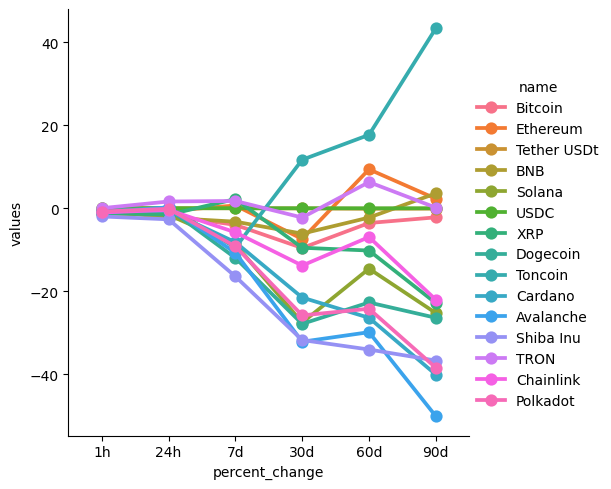

In [79]:
sns.catplot(x='percent_change', y='values', hue='name', data=df7, kind='point')

In [96]:
df10 = df[['name', 'quote.USD.price', 'timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,63679.59603,2024-06-21 23:19:44.522501
15,Bitcoin,63727.81541,NaT
30,Bitcoin,63727.81541,NaT
45,Bitcoin,63729.89233,NaT
60,Bitcoin,63721.71854,NaT
75,Bitcoin,63721.71854,NaT
90,Bitcoin,63691.24688,NaT
105,Bitcoin,63711.72680,NaT
120,Bitcoin,63719.21394,NaT
135,Bitcoin,63719.21394,NaT


In [106]:
starting_timestamp = pd.to_datetime('2024-06-21 23:20:44.522501')
current_timestamp = starting_timestamp
for i, is_nat in enumerate(df10['timestamp'].isna()):
    if is_nat:
        df10.at[i * 15, 'timestamp'] = current_timestamp
        current_timestamp += pd.Timedelta(minutes=1)

,name,quote.USD.price,timestamp
0,Bitcoin,63679.59603,2024-06-21 23:19:44.522501
15,Bitcoin,63727.81541,2024-06-21 23:20:44.522501
30,Bitcoin,63727.81541,2024-06-21 23:21:44.522501
45,Bitcoin,63729.89233,2024-06-21 23:22:44.522501
60,Bitcoin,63721.71854,2024-06-21 23:23:44.522501
75,Bitcoin,63721.71854,2024-06-21 23:24:44.522501
1,NaN,NaN,2024-06-21 23:20:44.522501
2,NaN,NaN,2024-06-21 23:21:44.522501
3,NaN,NaN,2024-06-21 23:22:44.522501
4,NaN,NaN,2024-06-21 23:23:44.522501


In [107]:
for i in range(1, 6):
    df10 = df10.drop(index=i)
df10

,name,quote.USD.price,timestamp
0,Bitcoin,63679.59603,2024-06-21 23:19:44.522501
15,Bitcoin,63727.81541,2024-06-21 23:20:44.522501
30,Bitcoin,63727.81541,2024-06-21 23:21:44.522501
45,Bitcoin,63729.89233,2024-06-21 23:22:44.522501
60,Bitcoin,63721.71854,2024-06-21 23:23:44.522501
75,Bitcoin,63721.71854,2024-06-21 23:24:44.522501


<Axes: xlabel='timestamp', ylabel='quote.USD.price'>

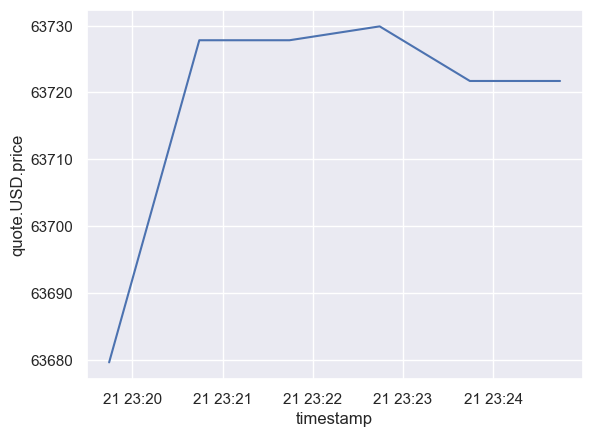

In [109]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data=df10)